In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

sys.path.append('../')

In [2]:
from SwotDiag.diagnosis import *

### Standard SWOT product (2 km, L3)

In [3]:
file = '../Samples/SWOT_L3_LR_SSH_Expert_006_532_20231121T123734_20231121T132901_v0.3_SMST_FOCUS.nc'
SWOT = xr.open_dataset(file)

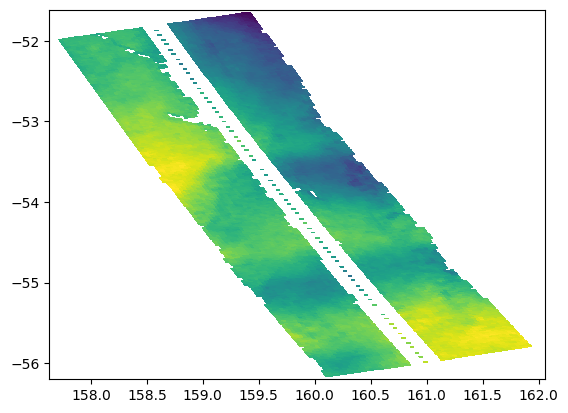

In [4]:
plt.pcolormesh(SWOT.longitude, SWOT.latitude, SWOT.ssha)

### Standard SSHA (not noiseless)

In [5]:
### Classical central point difference (stencil 5 points)
zeta_dxdy = compute_relative_vorticity_from_eta(SWOT.ssha, SWOT.longitude, SWOT.latitude, derivative = 'dxdy', n = 5)

### Slope fitting on 5*5 points 2D kernel
zeta_fit_5 = compute_relative_vorticity_from_eta(SWOT.ssha, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 5)

### Slope fitting on 9*9 points 2D kernel
zeta_fit_9 = compute_relative_vorticity_from_eta(SWOT.ssha, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 9)

100%|████████████████████████████████████████| 246/246 [00:00<00:00, 273.56it/s]


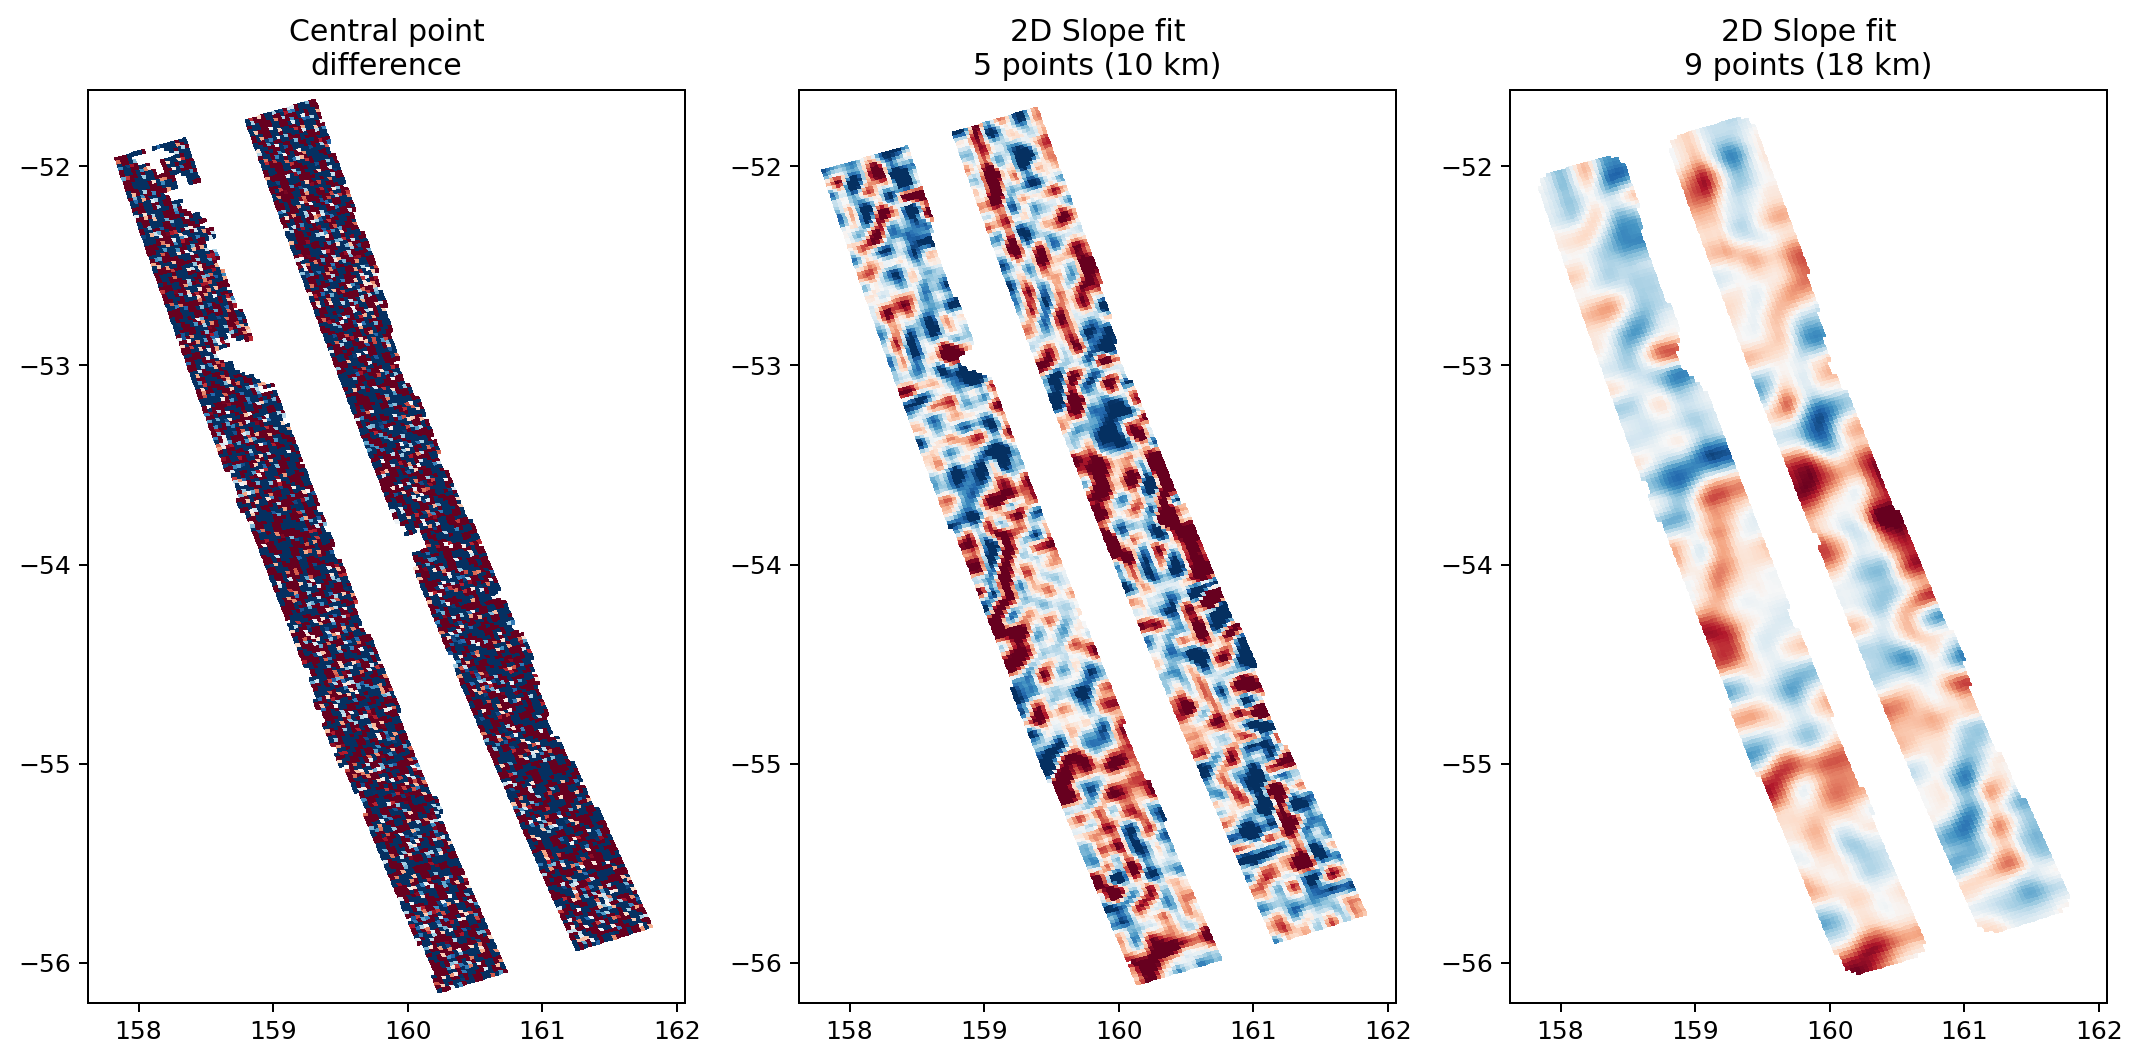

In [8]:
clim = (-0.5, 0.5)

plt.figure(figsize = (12, 6), dpi = 180)

plt.subplot(131)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_dxdy, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('Central point\ndifference')

plt.subplot(132)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_5, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n5 points (10 km)')

plt.subplot(133)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_9, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n9 points (18 km)')

plt.tight_layout()

#### Noiseless SSHA

In [11]:
### Classical central point difference (stencil 5 points)
zeta_dxdy = compute_relative_vorticity_from_eta(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'dxdy', n = 5)

### Slope fitting on 5*5 points 2D kernel
zeta_fit_5 = compute_relative_vorticity_from_eta(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 5)

### Slope fitting on 9*9 points 2D kernel
zeta_fit_9 = compute_relative_vorticity_from_eta(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 9)

### Slope fitting on 9*9 points 2D kernel
zeta_fit_13 = compute_relative_vorticity_from_eta(SWOT.ssha_noiseless, SWOT.longitude, SWOT.latitude, derivative = 'fit', n = 13)

100%|████████████████████████████████████████| 246/246 [00:00<00:00, 295.14it/s]


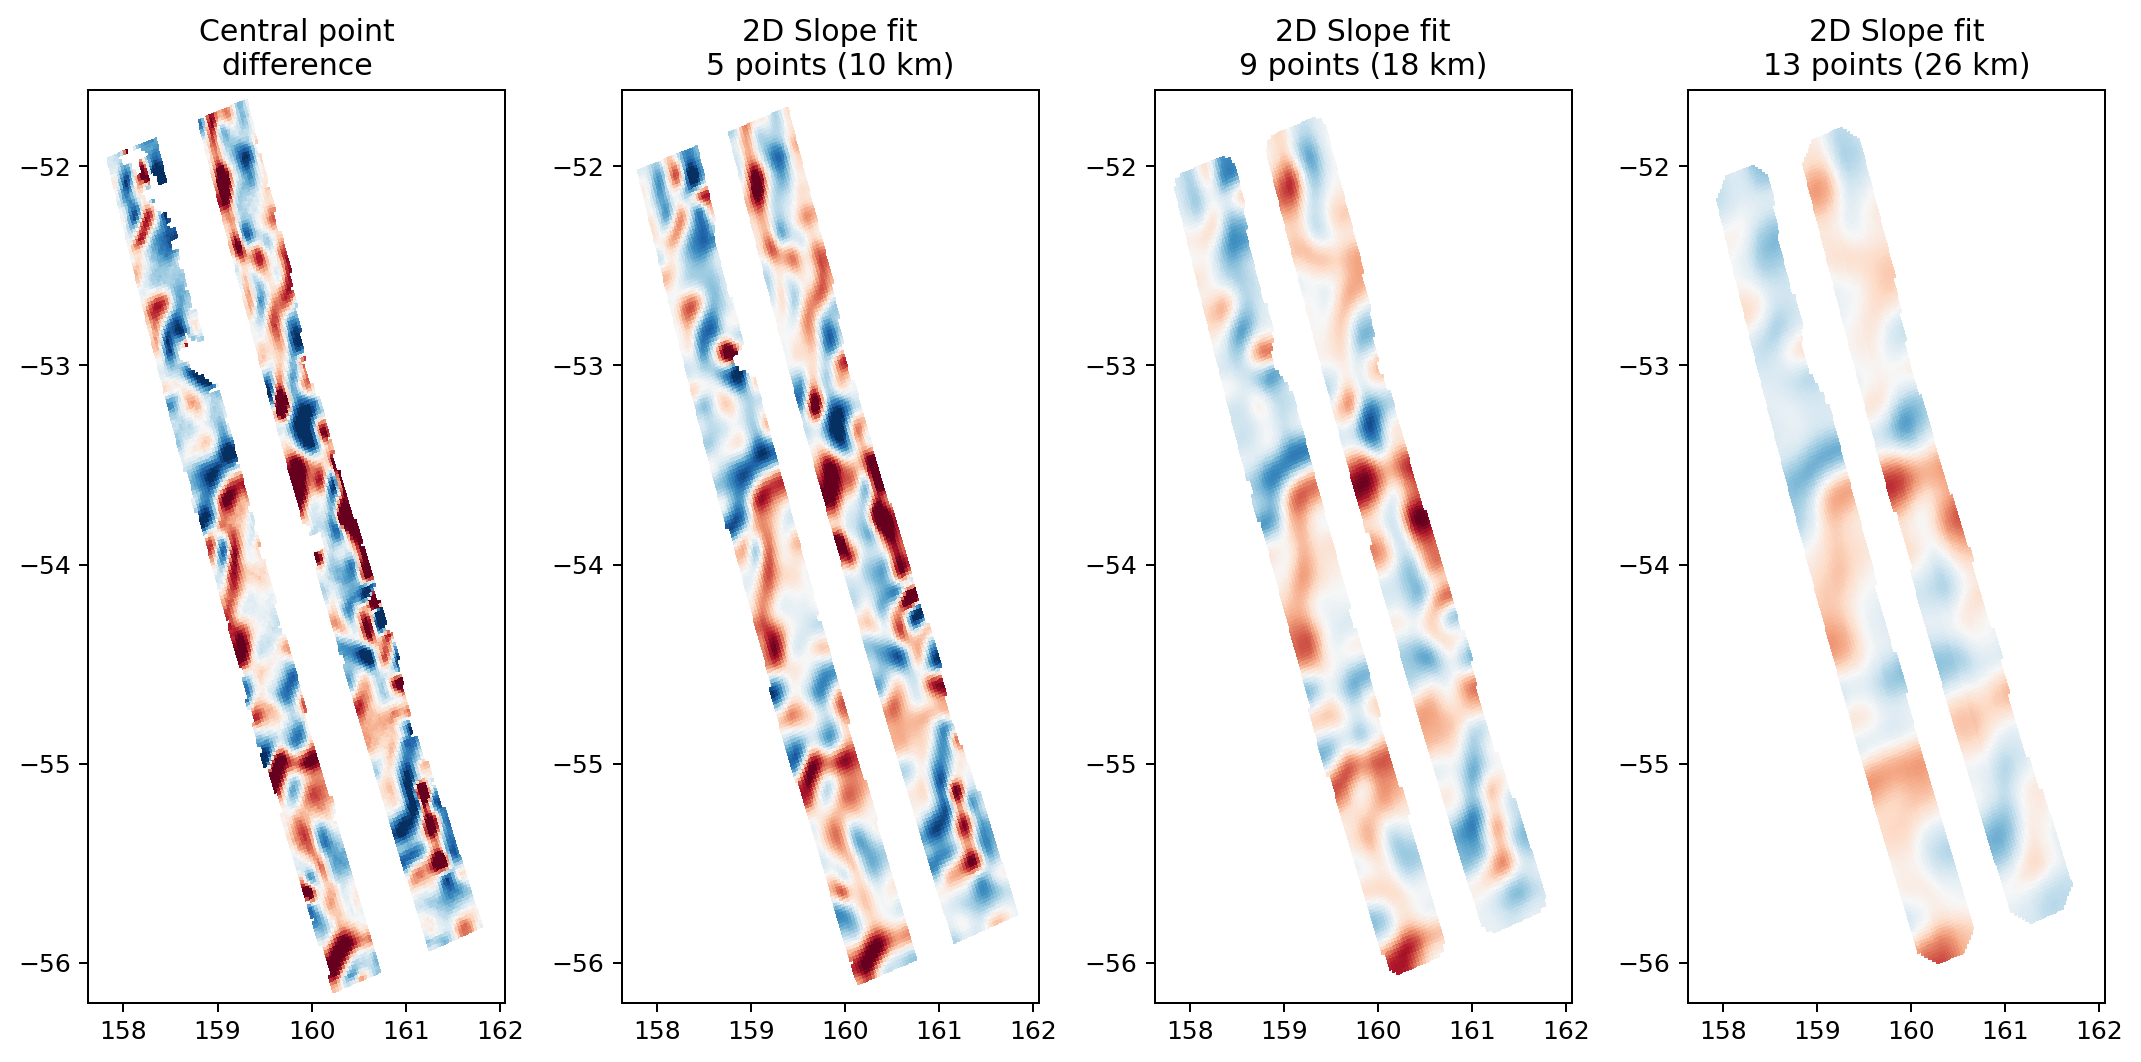

In [13]:
clim = (-0.5, 0.5)

plt.figure(figsize = (12, 6), dpi = 180)

plt.subplot(141)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_dxdy, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('Central point\ndifference')

plt.subplot(142)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_5, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n5 points (10 km)')

plt.subplot(143)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_9, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n9 points (18 km)')


plt.subplot(144)
plt.pcolormesh(SWOT.longitude, SWOT.latitude, zeta_fit_13, cmap = 'RdBu_r')
plt.clim(clim)
plt.title('2D Slope fit\n13 points (26 km)')

plt.tight_layout()